In [12]:
from glob import glob
import pandas as pd
import numpy as np

In [15]:

def find_demonstrative_index(expression, demonstratives):
    words = expression.split(' ')
    # Iterate over each word to find if it matches any of the demonstratives
    for i, word in enumerate(words):
        if word in demonstratives:
            return i  # Return the index of the first matching demonstrative
    return -1  # Return -1 if no demonstratives are found
demonstratives = ['this','that','one','those','these','there','here']


In [14]:

L = np.load('/home/deichler/code/code_iva24/bvh_pt_lengths.npy',allow_pickle=True)
framerate = 120
point_length = {}
for thing in L:
    item = list(thing.keys())[0].split('/')[-1]
    item = item.replace('.bvh','')
    point_length[item] = list(thing.values())[0]/framerate

point_length

{'st1.21493_22115_1.31stretch': 6.808333333333334,
 'st2.6483_7030_1.33stretch': 6.083333333333333,
 'st2_mirrored.7431_7795': 3.033333333333333,
 'st1_mirrored.3015_3401': 3.216666666666667,
 'st1.14295_14860': 4.708333333333333,
 'st2.6146_6478_0.9stretch': 2.4833333333333334,
 'st1_mirrored.17235_17589_1.26stretch': 3.725,
 'st1_mirrored.45958_46512_1.0stretch': 4.625,
 'st1.39261_40719': 12.15,
 'st1_mirrored.45687_45953': 2.216666666666667,
 'st1.15138_15625': 4.058333333333334,
 'st2_mirrored.1815_2311_0.99stretch': 4.1,
 'st2.9879_10507_1.23stretch': 6.433333333333334,
 'st1.16330_16795_0.92stretch': 3.558333333333333,
 'st1_mirrored.25173_25609_0.98stretch': 3.575,
 'st1_mirrored.19997_20370_1.01stretch': 3.15,
 'st1_mirrored.42513_43129_0.93stretch': 4.791666666666667,
 'st1_mirrored.17976_18360_1.23stretch': 3.933333333333333,
 'st1.45132_45682_1.16stretch': 5.325,
 'st2.8293_8847_0.94stretch': 4.341666666666667,
 'st1.7376_7753_0.82stretch': 2.575,
 'st1_mirrored.20375_20767

In [16]:
from glob import glob
files = glob('/home/deichler/data/sgs24/raw/tsv_pt_segments/*.tsv')
print(len(files))
words_to_exclude = ['left', 'right', 'middle', 'back']
files = [f for f in files if not any(word in f for word in words_to_exclude)]
pt_times = []
pt_names = []
pt_pre = {}
pt_post = {}
for fn in files:
    print(fn)
    temp_list = []
    item = fn.split('/')[-1].split('.tsv')[0]
    with open(fn) as f:
        with open(fn) as f:
            for line in f:
                t0, t1, wrd = line.strip().split('\t')
                t0, t1 = float(t0), float(t1)
                temp_list.append([t0, t1, wrd])
        df = pd.DataFrame(temp_list, columns=['t0','t1','wrd'])
        expr = ' '.join(df['wrd'])
        index  = find_demonstrative_index(expr, demonstratives)
        dem_time = df['t0'].iloc[index]
        total_time = point_length[item]
        pt_times.append((total_time, dem_time))
        pt_names.append(item)
        pt_pre[item] = dem_time
        pt_post[item] = point_length[item] - pt_pre[item]

1147
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1_mirrored.25173_25609.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1_mirrored.25614_26056_0.98stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1_mirrored.19997_20370_1.1stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1.29400_30760_0.98stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1_mirrored.17235_17589_1.1stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1.32625_33129_1.28stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1.28025_28393_1.38stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st2.5628_6141_0.91stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st2.5294_5623_1.29stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1.43572_44146_0.83stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1.9745_10055_1.0stretch.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st1.13491_13941.tsv
/home/deichler/data/sgs24/raw/tsv_pt_segments/st2_mirro

In [2]:
from glob import glob 
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

demonstratives = ['this','that','one','those','these','there','here']


In [3]:

def find_demonstrative_index(expression, demonstratives):
    words = expression.split(' ')
    # Iterate over each word to find if it matches any of the demonstratives
    for i, word in enumerate(words):
        if word in demonstratives:
            return i  # Return the index of the first matching demonstrative
    return -1  # Return -1 if no demonstratives are found
demonstratives = ['this','that','one','those','these','there','here']


# LOAD TIME DATA wav and pt


In [8]:
L = np.load('./wav_synth_lengths.npy',allow_pickle=True)
synth_length = {}
for thing in L:
    item = list(thing.keys())[0].split('/')[-1]
    item = item.replace('.mp3','')
    synth_length[item] = list(thing.values())[0]

synth_length


L = np.load('./bvh_pt_lengths.npy',allow_pickle=True)
framerate = 120
point_length = {}
for thing in L:
    item = list(thing.keys())[0].split('/')[-1]
    item = item.replace('.bvh','')
    point_length[item] = list(thing.values())[0]/framerate

point_length
print(len(point_length))

1162


# GET TSV to find dem location - for synth audio then original pt

In [6]:
files = glob('/home/deichler/data/sgs24/raw/tsv_synth_segments/*.tsv')
print(len(files))
words_to_exclude = ['left', 'right', 'middle', 'back']
files = [f for f in files if not any(word in f for word in words_to_exclude)]
print(len(files))
synth_times = []
synth_names = []
synth_data = {}
synth_pre = {}
synth_post = {}
for fn in files:
    temp_list = []
    item = fn.split('/')[-1].split('.tsv')[0]
    with open(fn) as f:
        with open(fn) as f:
            for line in f:
                t0, t1, wrd = line.strip().split('\t')
                t0, t1 = float(t0), float(t1)
                temp_list.append([t0, t1, wrd])
        df = pd.DataFrame(temp_list, columns=['t0','t1','wrd'])
        expr = ' '.join(df['wrd'])
        index  = find_demonstrative_index(expr, demonstratives)
        dem_time = df['t0'].iloc[index]
        if dem_time>5:
            continue
        total_time = synth_length[item]
        synth_times.append((total_time, dem_time))
        synth_pre[item] = dem_time
        synth_post[item] = df['t1'].iloc[index] - synth_pre[item]
        synth_data[item] = (dem_time,total_time)
        

print(len(synth_times))
print(synth_times)



1452
1322
1271
[(2.690612244897959, 0.87), (4.022857142857143, 0.16), (4.6236734693877555, 1.54), (2.9518367346938774, 2.34), (5.0416326530612245, 0.08), (5.093877551020408, 0.08), (4.6236734693877555, 3.13), (3.7616326530612243, 0.07), (4.12734693877551, 0.08), (5.015510204081632, 0.16), (1.3844897959183673, 0.52), (6.452244897959184, 1.38), (4.597551020408163, 0.09), (4.362448979591837, 0.1), (5.015510204081632, 0.05), (2.403265306122449, 0.17), (5.328979591836735, 0.8), (4.2057142857142855, 0.05), (2.089795918367347, 0.51), (4.310204081632653, 0.54), (2.690612244897959, 2.11), (1.3844897959183673, 0.46), (5.69469387755102, 0.18), (3.2914285714285714, 1.17), (2.0375510204081633, 0.15), (3.1608163265306124, 1.5), (5.668571428571428, 0.07), (6.217142857142857, 0.74), (4.728163265306122, 0.08), (2.9257142857142857, 1.84), (4.493061224489796, 0.06), (4.25795918367347, 0.07), (4.83265306122449, 2.6), (1.8024489795918368, 0.23), (3.0040816326530613, 0.37), (3.1608163265306124, 1.31), (3.65

In [9]:
files = glob('/home/deichler/data/sgs24/raw/tsv_pt_segments/*.tsv')
print(len(files))
words_to_exclude = ['left', 'right', 'middle', 'back']
files = [f for f in files if not any(word in f for word in words_to_exclude)]
pt_times = []
pt_names = []
pt_pre = {}
pt_post = {}
pt_data = {}
for fn in files:
    temp_list = []
    item = fn.split('/')[-1].split('.tsv')[0]
    with open(fn) as f:
        with open(fn) as f:
            for line in f:
                t0, t1, wrd = line.strip().split('\t')
                t0, t1 = float(t0), float(t1)
                temp_list.append([t0, t1, wrd])
        df = pd.DataFrame(temp_list, columns=['t0','t1','wrd'])
        expr = ' '.join(df['wrd'])
        index  = find_demonstrative_index(expr, demonstratives)
        dem_time = df['t0'].iloc[index]
        total_time = point_length[item]
        pt_times.append((total_time, dem_time))
        pt_names.append(item)
        pt_pre[item] = dem_time
        pt_post[item] = point_length[item] - pt_pre[item]
        pt_data[item] = (dem_time,total_time)

1147


{'st1.21493_22115_1.31stretch': 6.808333333333334, 'st2.6483_7030_1.33stretch': 6.083333333333333, 'st2_mirrored.7431_7795': 3.033333333333333, 'st1_mirrored.3015_3401': 3.216666666666667, 'st1.14295_14860': 4.708333333333333, 'st2.6146_6478_0.9stretch': 2.4833333333333334, 'st1_mirrored.17235_17589_1.26stretch': 3.725, 'st1_mirrored.45958_46512_1.0stretch': 4.625, 'st1.39261_40719': 12.15, 'st1_mirrored.45687_45953': 2.216666666666667, 'st1.15138_15625': 4.058333333333334, 'st2_mirrored.1815_2311_0.99stretch': 4.1, 'st2.9879_10507_1.23stretch': 6.433333333333334, 'st1.16330_16795_0.92stretch': 3.558333333333333, 'st1_mirrored.25173_25609_0.98stretch': 3.575, 'st1_mirrored.19997_20370_1.01stretch': 3.15, 'st1_mirrored.42513_43129_0.93stretch': 4.791666666666667, 'st1_mirrored.17976_18360_1.23stretch': 3.933333333333333, 'st1.45132_45682_1.16stretch': 5.325, 'st2.8293_8847_0.94stretch': 4.341666666666667, 'st1.7376_7753_0.82stretch': 2.575, 'st1_mirrored.20375_20767_1.32stretch': 4.325,

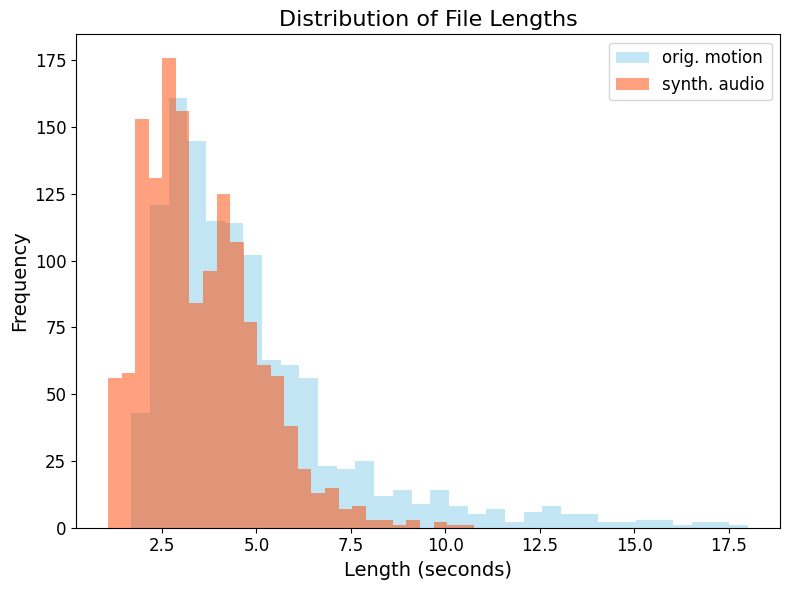

In [10]:
def plot_histogram(data1,data2,title,fname):
    """
    Creates a histogram from the given data and formats it for an ACM paper.
    
    Parameters:
        data (dict): A dictionary with keys as identifiers and values as lengths.
    """
    # Extract lengths from the dictionary
    lengths1 = data1['Length'].values
    lengths2 = data2['Length'].values

    # Set up the plot with ACM paper guidelines in mind
    plt.figure(figsize=(8, 6))
    plt.hist(lengths1, bins='auto', color='skyblue',alpha = 0.5,label ='orig. motion')
    plt.hist(lengths2, bins='auto', color='orangered',alpha = 0.5,label = 'synth. audio')
    # plt.hist(lengths1, bins='auto', color='skyblue', edgecolor='black',alpha = 0.5)

    # Labels and title
    plt.xlabel('Length (seconds)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(title, fontsize=16)
    
    # Tick parameters
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Layout adjustments
    plt.tight_layout()
    
    plt.legend(fontsize=12)
    # Save the plot as a high-resolution PNG for inclusion in an ACM paper
    plt.savefig(fname, dpi=300)

    
    # Optionally display the plot
    # plt.show()
print(point_length)
data_tuples = [(k,v) for k,v in point_length.items()]
df = pd.DataFrame(data_tuples, columns=['File Path', 'Length'])
df['Length'] = df['Length'].astype(float)
data_tuples = [(k,v) for k,v in synth_length.items()]
df2 = pd.DataFrame(data_tuples, columns=['File Path', 'Length'])
plot_histogram(df,df2,'Distribution of File Lengths','./histogram_len.pdf')
# # print(synth_length)
# data_tuples = [(k,v) for k,v in synth_length.items()]
# df = pd.DataFrame(data_tuples, columns=['File Path', 'Length'])
# plot_histogram(df,'Distribution of Audio File Lengths','./histogram_len_synth.pdf')

# PREPARE MATCHING COST 

In [11]:
files = glob('/home/deichler/data/sgs24/raw/tsv_synth_segments/*.tsv')
print(len(files))
words_to_exclude = ['left', 'right', 'middle', 'back']
files = [f for f in files if not any(word in f for word in words_to_exclude)]
print(len(files))
synth_times = []
synth_names = []
synth_data = {}
synth_pre = {}
synth_post = {}
for fn in files:
    temp_list = []
    item = fn.split('/')[-1].split('.tsv')[0]
    with open(fn) as f:
        with open(fn) as f:
            for line in f:
                t0, t1, wrd = line.strip().split('\t')
                t0, t1 = float(t0), float(t1)
                temp_list.append([t0, t1, wrd])
        df = pd.DataFrame(temp_list, columns=['t0','t1','wrd'])
        expr = ' '.join(df['wrd'])
        index  = find_demonstrative_index(expr, demonstratives)
        dem_time = df['t0'].iloc[index]
        if dem_time>5:
            continue
        total_time = synth_length[item]
        synth_times.append((total_time, dem_time))
        synth_pre[item] = dem_time
        synth_post[item] = df['t1'].iloc[index] - synth_pre[item]
        synth_data[item] = (dem_time,total_time)
        

print(len(synth_times))
print(synth_times)



1452
1322
1271
[(2.690612244897959, 0.87), (4.022857142857143, 0.16), (4.6236734693877555, 1.54), (2.9518367346938774, 2.34), (5.0416326530612245, 0.08), (5.093877551020408, 0.08), (4.6236734693877555, 3.13), (3.7616326530612243, 0.07), (4.12734693877551, 0.08), (5.015510204081632, 0.16), (1.3844897959183673, 0.52), (6.452244897959184, 1.38), (4.597551020408163, 0.09), (4.362448979591837, 0.1), (5.015510204081632, 0.05), (2.403265306122449, 0.17), (5.328979591836735, 0.8), (4.2057142857142855, 0.05), (2.089795918367347, 0.51), (4.310204081632653, 0.54), (2.690612244897959, 2.11), (1.3844897959183673, 0.46), (5.69469387755102, 0.18), (3.2914285714285714, 1.17), (2.0375510204081633, 0.15), (3.1608163265306124, 1.5), (5.668571428571428, 0.07), (6.217142857142857, 0.74), (4.728163265306122, 0.08), (2.9257142857142857, 1.84), (4.493061224489796, 0.06), (4.25795918367347, 0.07), (4.83265306122449, 2.6), (1.8024489795918368, 0.23), (3.0040816326530613, 0.37), (3.1608163265306124, 1.31), (3.65

In [14]:
files = glob('/home/deichler/data/sgs24/raw/tsv_pt_segments/*.tsv')
print(len(files))
words_to_exclude = ['left', 'right', 'middle', 'back']
files = [f for f in files if not any(word in f for word in words_to_exclude)]
pt_times = []
pt_names = []
pt_pre = {}
pt_post = {}
pt_data = {}
for fn in files:
    temp_list = []
    item = fn.split('/')[-1].split('.tsv')[0]
    with open(fn) as f:
        with open(fn) as f:
            for line in f:
                t0, t1, wrd = line.strip().split('\t')
                t0, t1 = float(t0), float(t1)
                temp_list.append([t0, t1, wrd])
        df = pd.DataFrame(temp_list, columns=['t0','t1','wrd'])
        expr = ' '.join(df['wrd'])
        index  = find_demonstrative_index(expr, demonstratives)
        dem_time = df['t0'].iloc[index]
        total_time = point_length[item]
        pt_times.append((total_time, dem_time))
        pt_names.append(item)
        pt_pre[item] = dem_time
        pt_post[item] = point_length[item] - pt_pre[item]
        pt_data[item] = (dem_time,total_time)
        
pt_names

1147


['st1_mirrored.25173_25609',
 'st1_mirrored.25614_26056_0.98stretch',
 'st1_mirrored.19997_20370_1.1stretch',
 'st1.29400_30760_0.98stretch',
 'st1_mirrored.17235_17589_1.1stretch',
 'st1.32625_33129_1.28stretch',
 'st1.28025_28393_1.38stretch',
 'st2.5628_6141_0.91stretch',
 'st2.5294_5623_1.29stretch',
 'st1.43572_44146_0.83stretch',
 'st1.9745_10055_1.0stretch',
 'st1.13491_13941',
 'st2_mirrored.5294_5623_1.03stretch',
 'st1_mirrored.45687_45953_1.08stretch',
 'st1.14295_14860_1.24stretch',
 'st1_mirrored.42513_43129_0.93stretch',
 'st1_mirrored.16796_17230_0.98stretch',
 'st2.10512_10854_1.06stretch',
 'st1.45132_45682_1.05stretch',
 'st1_mirrored.13251_13486_1.19stretch',
 'st1.33801_34062_1.04stretch',
 'st1_mirrored.7376_7753_1.18stretch',
 'st1.16330_16795_0.92stretch',
 'st2_mirrored.10512_10854_0.99stretch',
 'st2_mirrored.1527_1810',
 'st1.34421_34995_0.85stretch',
 'st1.27461_27769_1.04stretch',
 'st1_mirrored.34065_34416_1.33stretch',
 'st1.30765_31999_1.39stretch',
 'st1

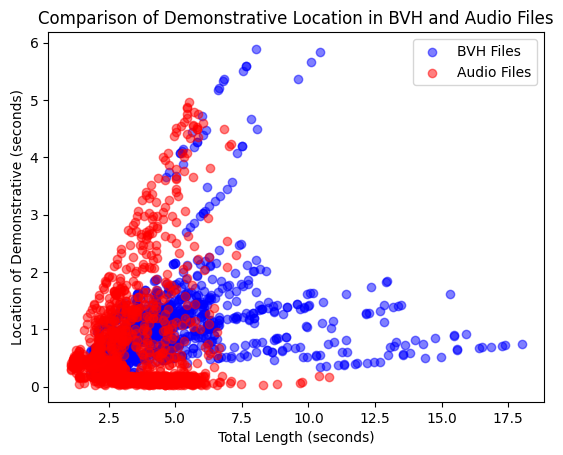

In [15]:
import matplotlib.pyplot as plt

# Let's assume you have two lists of tuples containing (total_length, index_time)
# One for BVH files and one for audio files, where each tuple corresponds to a matched pair.
bvh_data = pt_times  # replace with your actual data
audio_data = synth_times# replace with your actual data
# audio_data = [(x[0],x[1]+0.5) for x in audio_data]

# Unzip the tuples to get separate lists for total length and index time for each dataset
bvh_lengths, bvh_indices = zip(*bvh_data)
audio_lengths, audio_indices = zip(*audio_data)

# Create a scatter plot
plt.scatter(bvh_lengths, bvh_indices, alpha=0.5, color='blue', label='BVH Files')
plt.scatter(audio_lengths, audio_indices, alpha=0.5, color='red', label='Audio Files')

# Add labels and legend
plt.xlabel('Total Length (seconds)')
plt.ylabel('Location of Demonstrative (seconds)')

plt.title('Comparison of Demonstrative Location in BVH and Audio Files')
plt.legend()

# Show the plot
plt.show()


In [16]:
# Convert the list to a numpy array for statistical calculations
synth_lengths_array = np.array([x[0] for x in synth_times])
print(synth_lengths_array)
lengths_array = np.array(synth_lengths_array)

lengths_array_pt = np.array([x[0] for x in pt_times])
# Calculate the mean and standard deviation
mean_length = np.mean(lengths_array)
std_dev_length = np.std(lengths_array)

# Calculate the 50th (median) and 75th percentiles
median_length_syn = np.percentile(lengths_array, 50)
percentile_75_length = np.percentile(lengths_array, 75)
percentile_75_length

cutoff_time_syn = median_length_syn

median_length_pt = np.percentile(lengths_array_pt, 50)
percentile_75_length = np.percentile(lengths_array, 75)
percentile_75_length

cutoff_time_pt = median_length_pt

print(len(pt_data))
print(len(synth_data))

short_pt = {k:v for k,v in pt_data.items() if v[1]<cutoff_time_pt}
short_synth = {k:v for k,v in synth_data.items() if v[1]<cutoff_time_syn}
long_pt = {k:v for k,v in pt_data.items() if v[1]>=cutoff_time_pt}
long_synth = {k:v for k,v in synth_data.items() if v[1]>=cutoff_time_syn}

synth_pre_short = {k:v for k,v in synth_pre.items() if k in short_synth}
synth_post_short = {k:v for k,v in synth_post.items() if k in short_synth}
pt_pre_short = {k:v for k,v in pt_pre.items() if k in short_pt}
pt_post_short = {k:v for k,v in pt_post.items() if k in short_pt}



[2.69061224 4.02285714 4.62367347 ... 4.02285714 4.07510204 4.31020408]
1147
1271


In [17]:
# make distance matrix
D = []
synth_pre = synth_pre_short
synth_post = synth_post_short
pt_pre = pt_pre_short
pt_post = pt_post_short

for syntitem in list(synth_pre.keys())[:]:
    row = []
    for pointitem in list(pt_pre.keys())[:]:
        syntpre = synth_pre[syntitem]
        syntpost = synth_post[syntitem]
        pointpre = pt_pre[pointitem]
        pointpost = pt_post[pointitem]

        cost = abs(syntpre-pointpre) + abs(syntpost-pointpost)
        if synth_length[syntitem] > point_length[pointitem]:
            cost *= 10
        # penalize if synt starts before or ends after point
        if syntpre > pointpre:
            cost *= 2
        if syntpost > pointpost:
            cost *= 2
        row.append(cost)
    
    D.append(row)
dd = np.array(D)
dd.shape

(631, 573)

In [18]:
from munkres import Munkres
m = Munkres()
assignment_re = m.compute(D)
f = open('assignment_short.csv','w')
f.write('syntitem,pointitem,offset\n')
for pair in assignment_re:
    syntidx,pointidx = pair
    syntitem = list(synth_pre.keys())[syntidx]
    pointitem = list(pt_pre.keys())[pointidx]
    f.write('{},{},{}\n'.format(syntitem, pointitem, pt_pre[pointitem]-synth_pre[syntitem]))
f.close()

ModuleNotFoundError: No module named 'munkres'